In [1]:
import numpy as np
import pandas as pd
#PREVIOUS_MAX_ROWS = pd.options.display.max_rows

#np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib

#plt.rc('figure', figsize=(10, 6))
#np.set_printoptions(precision=4, suppress=True)
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [2]:
pd.options.display.max_rows = 10
#pd.set_option('display.max_rows', 10)

In [3]:
frame1 = pd.read_excel('SampleData/logdataVpVs.xlsx', 'logdata')
frame1

,DEPTH,DTCO,DTSM,RHOZ
0,693.4200,156.0565,469.2656,4.5631
1,693.5724,155.0785,446.2663,4.5650
2,693.7248,153.8340,436.9780,4.5756
3,693.8772,151.9469,432.6328,4.5771
4,694.0296,150.8684,425.2656,4.5780
...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224
10965,2364.4860,108.0000,214.5455,2.3121
10966,2364.6384,108.0000,214.5455,2.2996
10967,2364.7908,108.0000,214.5455,2.2953


In [4]:
#ind2=np.where(amat[:,2]<0)
#ind2

In [5]:
#xlsx = pd.ExcelFile('data/logdataVpVs.xlsx')
#pd.read_excel(xlsx, 'logdata')
#frame = pd.read_excel('data/logdataVpVs.xlsx', 'logdata',index_col='DEPTH', parse_dates=True)
#frame

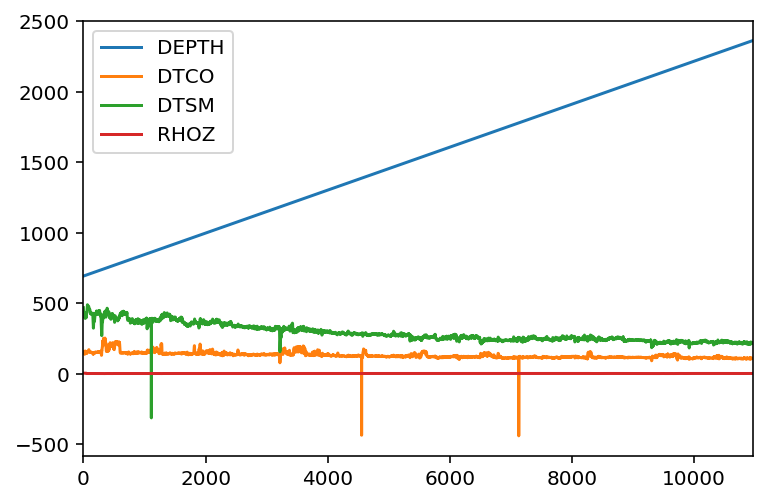

In [6]:
frame1.plot(kind='line');

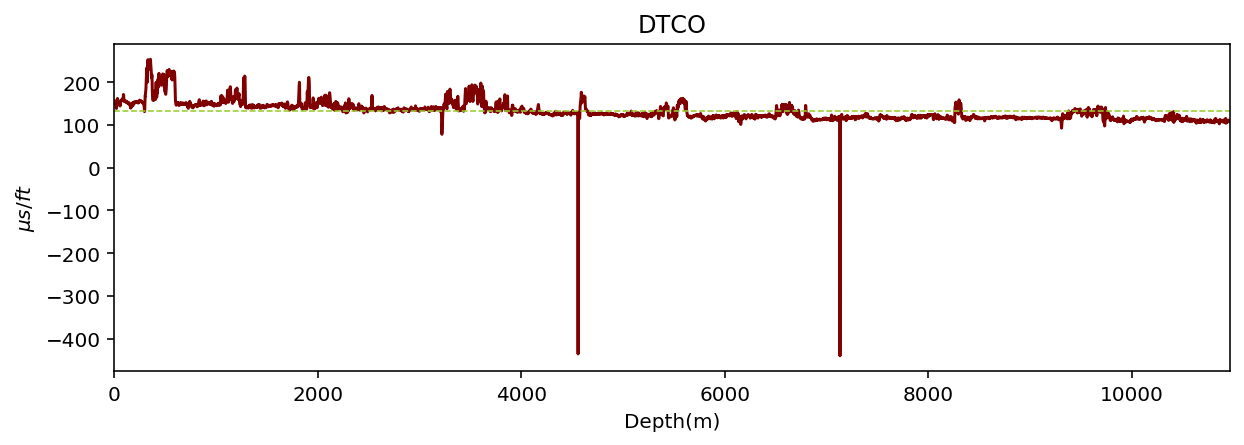

In [7]:
ax = frame1['DTCO'].plot(kind='line', title='DTCO', color='maroon', figsize=(10, 3))
ax.set_xlabel('Depth(m)')
ax.set_ylabel('$\mu s/ft$')
ax.axhline(frame1['DTCO'].mean(), color="yellowgreen", linestyle="--", linewidth=.8);

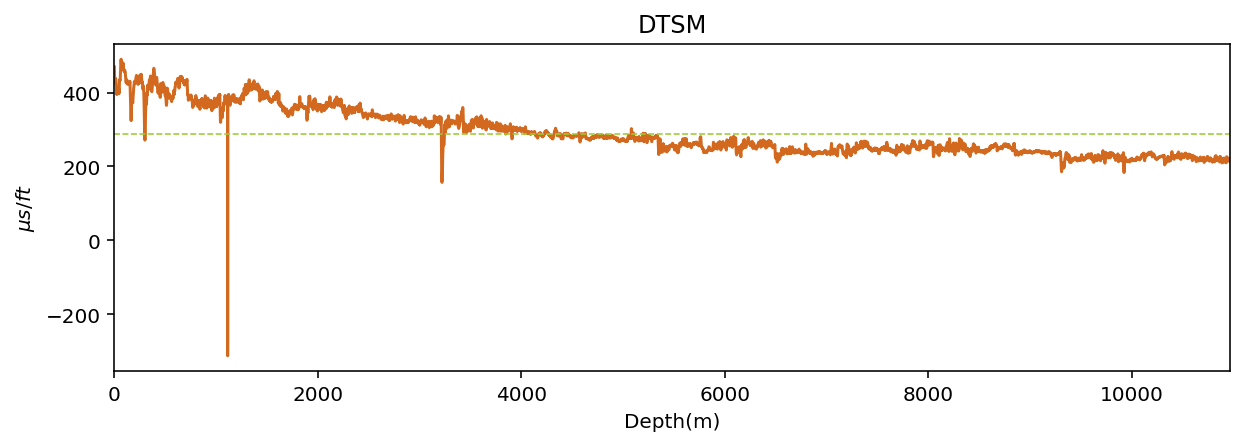

In [8]:
ax = frame1['DTSM'].plot(kind='line', title='DTSM', color='chocolate', figsize=(10, 3))
ax.set_xlabel('Depth(m)')
ax.set_ylabel('$\mu s/ft$')
ax.axhline(frame1['DTSM'].mean(), color="yellowgreen", linestyle="--", linewidth=.8);

In [9]:
resultCO = np.where(frame1['DTCO'] < 0)
resultCO 

(array([4557, 7131], dtype=int64),)

In [10]:
resultSM = np.where(frame1['DTSM'] < 0)
resultSM

(array([1113], dtype=int64),)

Text(0, 0.5, '$\\mu s/ft$')

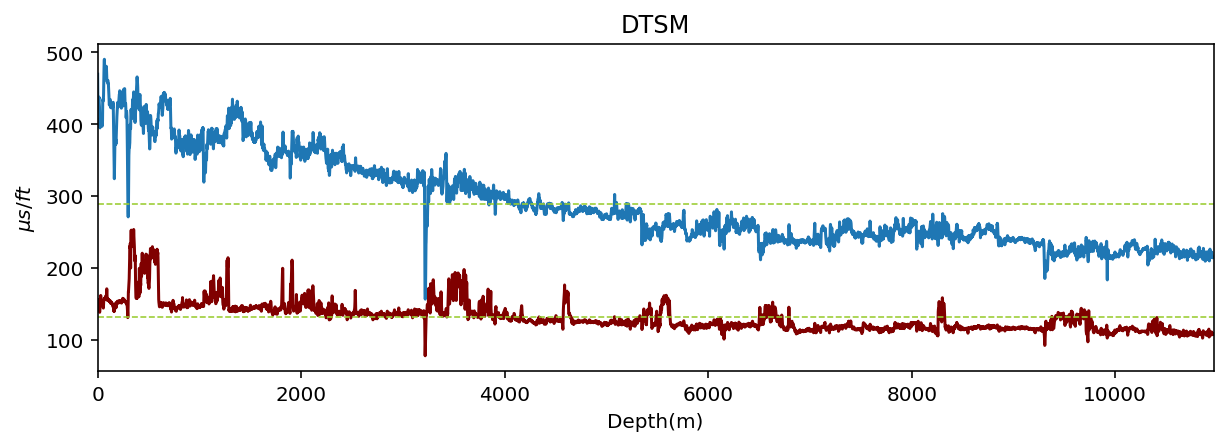

In [11]:
editlog1=frame1.drop([1113,4557,7131])
ax = editlog1['DTCO'].plot(kind='line', title='DTCO', color='maroon', figsize=(10, 3))
ax.axhline(frame1['DTCO'].mean(), color="yellowgreen", linestyle="--", linewidth=.8);
ax = editlog1['DTSM'].plot(kind='line', title='DTSM')
ax.axhline(frame1['DTSM'].mean(), color="yellowgreen", linestyle="--", linewidth=.8);
ax.set_xlabel('Depth(m)')
ax.set_ylabel('$\mu s/ft$')


In [12]:
#writer = pd.ExcelWriter('ex2.xlsx')
#frame.to_excel(writer, 'logdata')
#writer.save()

In [13]:
#!rm ex2.xlsx

In [14]:
#mat=np.asmatrix(frame.as_matrix())
#mat

In [15]:
#ind1=np.where(amat[:,1]<0)
#ind1

# Sonic log: 
A sonic log provides a formation interval transit time, which typically varies lithology and rock texture but particularly porosity. The logging tool consists of a piezoelectric transmitter and receiver and the time taken to for the sound wave to travel the fixed distance between the two is recorded as an interval transit time.

     **Delta-T Compressional: DTCO  [$\mu s/ft$]     for calculating P-wave velocity ** 
     **Delta-T Shear:         DTSM  [$\mu s/ft$]     for calculating S-wave velocity**


Mudrock Line   $Vp=1.16Vs+1360(m/s)$ 

In [20]:
editlog1['VP']=3.048e5/editlog1['DTCO']
editlog1['VS']=3.048e5/editlog1['DTSM']
editlog1['Mudrock']=1.16*editlog1['VS']+1360

In [21]:
editlog1

,DEPTH,DTCO,DTSM,RHOZ,VP,VS,Mudrock
0,693.4200,156.0565,469.2656,4.5631,1953.138767,649.525557,2113.449646
1,693.5724,155.0785,446.2663,4.5650,1965.456204,683.000262,2152.280304
2,693.7248,153.8340,436.9780,4.5756,1981.356527,697.517953,2169.120825
3,693.8772,151.9469,432.6328,4.5771,2005.963926,704.523559,2177.247328
4,694.0296,150.8684,425.2656,4.5780,2020.303788,716.728557,2191.405127
...,...,...,...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224,2822.222222,1420.677665,3007.986092
10965,2364.4860,108.0000,214.5455,2.3121,2822.222222,1420.677665,3007.986092
10966,2364.6384,108.0000,214.5455,2.2996,2822.222222,1420.677665,3007.986092
10967,2364.7908,108.0000,214.5455,2.2953,2822.222222,1420.677665,3007.986092


Text(0, 0.5, 'Vp (m/s)')

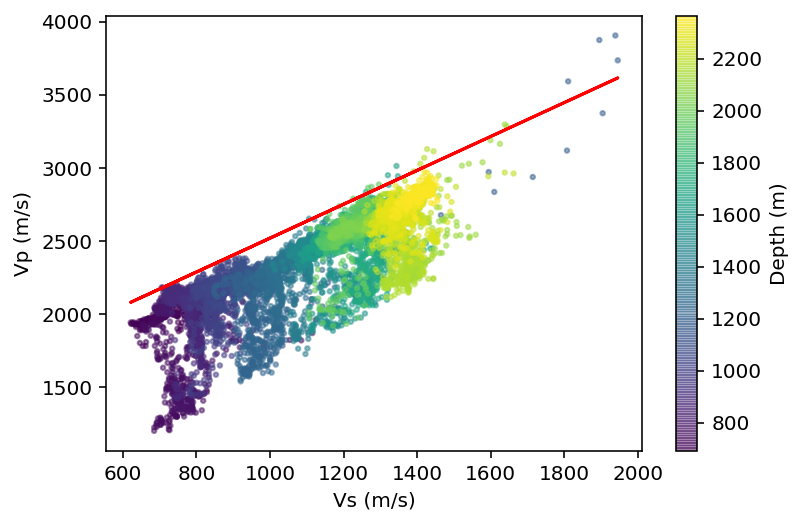

In [23]:
colors = editlog1['DEPTH']
plt.scatter(editlog1['VS'],editlog1['VP'], c=colors,s=5, alpha=0.5)
plt.plot(editlog1['VS'],editlog1['Mudrock'],'r')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")

function calculating best fit parameters $ y=mx+c $

In [24]:
from statistics import mean
def best_fit(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [26]:
m, b = best_fit(editlog1['VS'],editlog1['VP'])
print(m, b)

1.194513045888763 1050.1163007574498


In [27]:
regression_line = [(m*x)+b for x in editlog1['VS']]

Text(0, 0.5, 'Vp (m/s)')

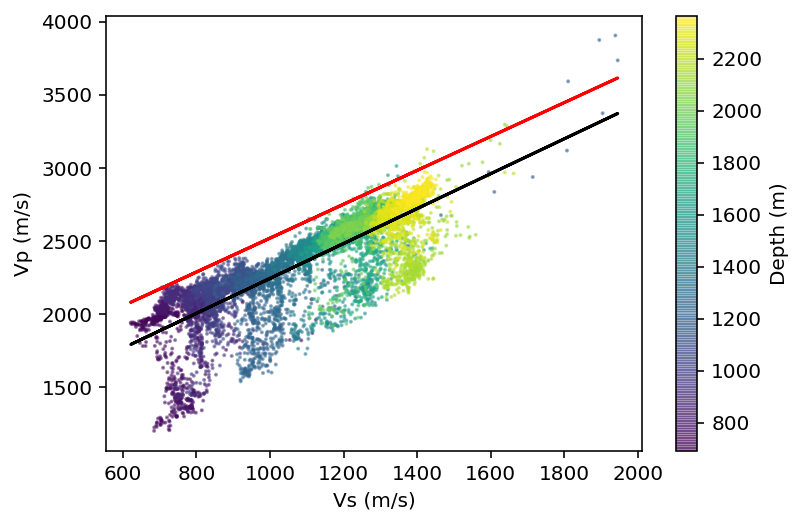

In [31]:
colors = editlog1['DEPTH']
plt.scatter(editlog1['VS'],editlog1['VP'], c=colors,s=1, alpha=0.5)
plt.plot(editlog1['VS'],editlog1['Mudrock'],'r')
plt.plot(editlog1['VS'],regression_line,'k')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")

Use of numpy.polyfit degree= 1 for a straight line https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [32]:
z = np.polyfit(editlog1['VS'],editlog1['VP'], 1)
z

array([   1.19451305, 1050.11630076])